In [10]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()
from pyquil.api import get_qc

In [11]:
def small_ansatz(x):
    return Program(X(0),RX(1.57,0),H(2),CNOT(0,2),RZ(x[0],2),CNOT(0,2),RX(-1.57,0),H(2),)

In [12]:
import openfermionpyscf as ofpyscf
import openfermion as of
from openfermion.transforms import *
from openfermion.utils import *
from openfermion.hamiltonians import MolecularData
import numpy as np
import pyscf

In [20]:
import openfermionpyscf as ofpyscf
from openfermion.ops import QubitOperator
from forestopenfermion import pyquilpauli_to_qubitop, qubitop_to_pyquilpauli
z0 = QubitOperator('Z0')
z0z1 = QubitOperator('Z0 Z1')
z2=QubitOperator('Z2')
z1z2z3=QubitOperator('Z1 Z2 Z3')
z1=QubitOperator('Z1')
y0z1y2z3=QubitOperator('Y0 Z1 Y2 Z3')
x0z1x2=QubitOperator('X0 Z1 X2')
x0z1x2z3=QubitOperator('X0 Z1 X2 Z3')
y0z1y2=QubitOperator('Y0 Z1 Y2')
z0z2=QubitOperator('Z0 Z2')
z0z1z2z3=QubitOperator('Z0 Z1 Z2 Z3')
z0z1z2=QubitOperator('Z0 Z1 Z2')
z0z2z3=QubitOperator('Z0 Z2 Z3')
z1z3=QubitOperator('Z1 Z3')


z0_pauli = qubitop_to_pyquilpauli(z0)

z0z1_pauli = qubitop_to_pyquilpauli(z0z1)

z2_pauli=qubitop_to_pyquilpauli(z2)

z1z2z3_pauli=qubitop_to_pyquilpauli(z1z2z3)

z1_pauli=qubitop_to_pyquilpauli(z1)

y0z1y2z3_pauli=qubitop_to_pyquilpauli(y0z1y2z3)

x0z1x2_pauli=qubitop_to_pyquilpauli(x0z1x2)

x0z1x2z3_pauli=qubitop_to_pyquilpauli(x0z1x2z3)

y0z1y2_pauli=qubitop_to_pyquilpauli(y0z1y2)

z0z2_pauli=qubitop_to_pyquilpauli(z0z2)

z0z1z2z3_pauli=qubitop_to_pyquilpauli(z0z1z2z3)

z0z1z2_pauli=qubitop_to_pyquilpauli(z0z1z2)

z0z2z3_pauli=qubitop_to_pyquilpauli(z0z2z3)

z1z3_pauli=qubitop_to_pyquilpauli(z1z3)

In [ ]:
(-0.09886396933545721+0j)*I + (0.17119774903432944+0j)*Z0 + (0.17119774903432936+0j)*Z0*Z1 + (-0.22278593040418498+0j)*Z2 + (-0.22278593040418496+0j)*Z1*Z2*Z3 + (0.16862219158920938+0j)*Z1 + (0.04532220205287401+0j)*Y0*Z1*Y2*Z3 + (0.04532220205287401+0j)*X0*Z1*X2 + (0.04532220205287401+0j)*X0*Z1*X2*Z3 + (0.04532220205287401+0j)*Y0*Z1*Y2 + (0.120544822053018+0j)*Z0*Z2 + (0.165867024105892+0j)*Z0*Z1*Z2*Z3 + (0.165867024105892+0j)*Z0*Z1*Z2 + (0.120544822053018+0j)*Z0*Z2*Z3 + (0.17434844185575687+0j)*Z1*Z3

In [14]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,minimizer_kwargs={'method': 'nelder-mead'})

In [33]:
import numpy as np

thetas = np.linspace(0,6,100)
E_z0 = [vqe_inst.expectation(small_ansatz([param]),z0_pauli, None ,qvm) for param in thetas]
E_z0z1 = [vqe_inst.expectation(small_ansatz([param]),z0z1_pauli, None ,qvm) for param in thetas]
E_z2 = [vqe_inst.expectation(small_ansatz([param]),z2_pauli, None ,qvm) for param in thetas]
E_z1z2z3=[vqe_inst.expectation(small_ansatz([param]),z1z2z3_pauli, None ,qvm) for param in thetas]
E_z1=[vqe_inst.expectation(small_ansatz([param]),z1_pauli, None ,qvm) for param in thetas]
E_y0z1y2z3=[vqe_inst.expectation(small_ansatz([param]),y0z1y2z3_pauli, None ,qvm) for param in thetas]
E_x0z1x2=[vqe_inst.expectation(small_ansatz([param]),x0z1x2_pauli, None ,qvm) for param in thetas]
E_x0z1x2z3=[vqe_inst.expectation(small_ansatz([param]),x0z1x2z3_pauli, None ,qvm) for param in thetas]
E_y0z1y2=[vqe_inst.expectation(small_ansatz([param]),y0z1y2_pauli, None ,qvm) for param in thetas]
E_z0z2=[vqe_inst.expectation(small_ansatz([param]),z0z2_pauli, None ,qvm) for param in thetas]
E_z0z1z2z3=[vqe_inst.expectation(small_ansatz([param]),z0z1z2z3_pauli, None ,qvm) for param in thetas]
E_z0z1z2=[vqe_inst.expectation(small_ansatz([param]),z0z1z2_pauli, None ,qvm) for param in thetas]
E_z0z2z3=[vqe_inst.expectation(small_ansatz([param]),z0z2z3_pauli, None ,qvm) for param in thetas]
E_z1z3=[vqe_inst.expectation(small_ansatz([param]),z1z3_pauli, None ,qvm) for param in thetas]

In [62]:
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

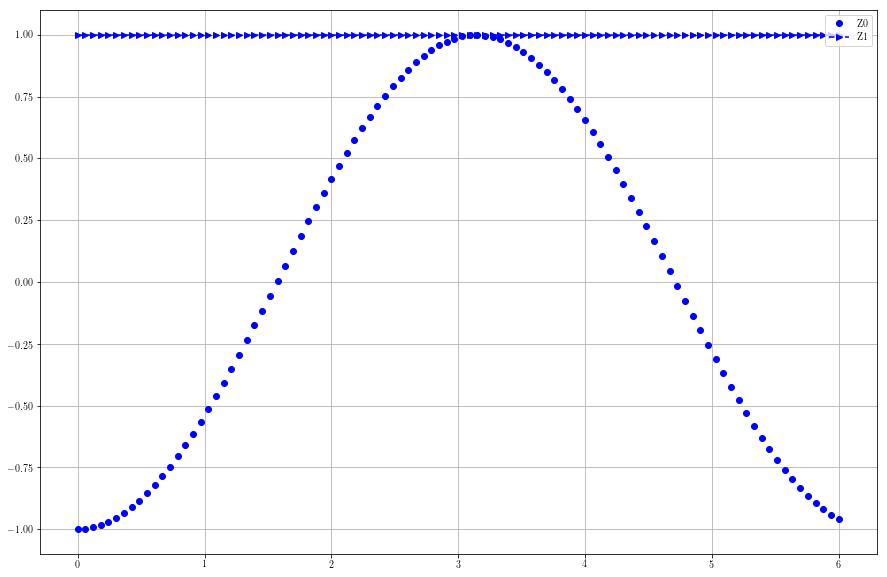

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_z0,'bo',label='Z0')
plt.plot(thetas,E_z1,'b-->',label='Z1')
#plt.plot(thetas,E_z2,'r--*',label='Z2')

#plt.plot(thetas,E_z0z1,'g--*',label='Z0 Z1')
#plt.plot(thetas,E_z0z2,'m--*',label= 'Z0 Z2')
#plt.plot(thetas,E_z1z3,'yo',label=' Z1 Z3')

#plt.plot(thetas,E_z0z1z2,'y*',label='Z0 Z1 Z2')
#plt.plot(thetas,E_z0z2z3,'mo',label= 'Z0 Z2 Z3')
#plt.plot(thetas,E_z1z2z3,'bo',label='Z1 Z2 Z3')
#plt.plot(thetas,E_z0z1z2z3,'b*',label='Z0 Z1 Z2 Z3')

#plt.plot(thetas,E_y0z1y2z3,'yo',label='Y0 Z1 Y2 Z3')
#plt.plot(thetas,E_y0z1y2,'m*',label='Y0 Z1 Y2')

#plt.plot(thetas,E_x0z1x2,'ro',label=' X0 Z1 X2')
#plt.plot(thetas,E_x0z1x2z3,'go',label= 'X0 Z1 X2 Z3')

plt.legend(loc=1)

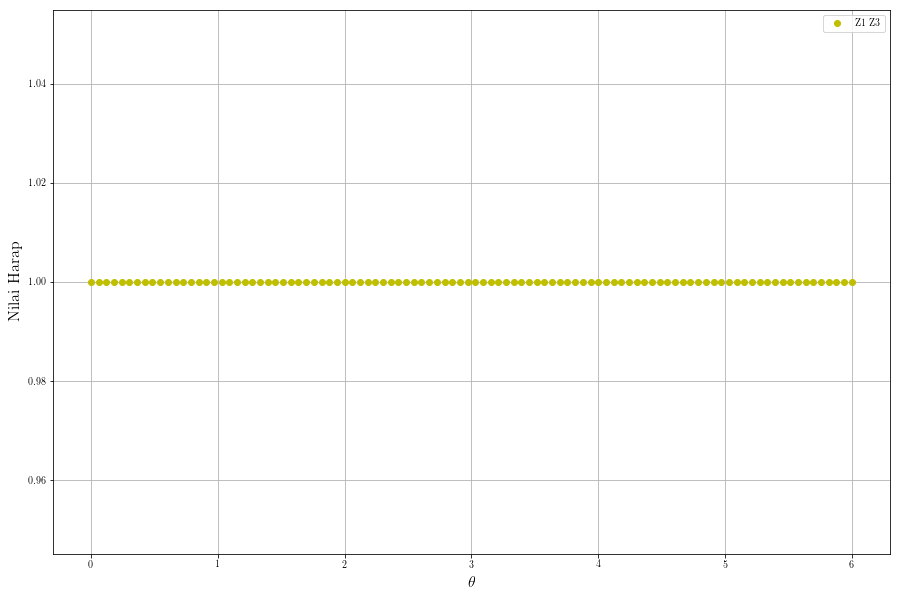

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.grid()
#plt.plot(thetas,E_z0z1,'g--*',label='Z0 Z1')
#plt.plot(thetas,E_z0z2,'m--*',label= 'Z0 Z2')
plt.plot(thetas,E_z1z3,'yo',label=' Z1 Z3')
plt.xlabel(r'$\theta$',fontsize=16)
plt.ylabel('Nilai Harap',fontsize=16)

plt.legend(loc=1)

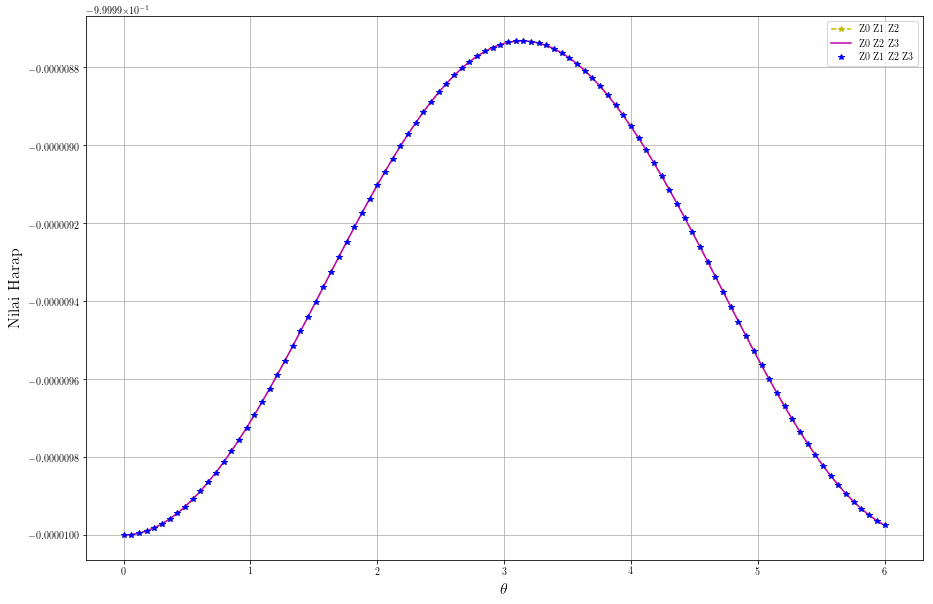

In [69]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_z0z1z2,'y--*',label='Z0 Z1 Z2')
plt.plot(thetas,E_z0z2z3,'m-',label= 'Z0 Z2 Z3')
#plt.plot(thetas,E_z1z2z3,'bo',label='Z1 Z2 Z3')
plt.plot(thetas,E_z0z1z2z3,'b*',label='Z0 Z1 Z2 Z3')
plt.xlabel(r'$\theta$',fontsize=16)
plt.ylabel('Nilai Harap',fontsize=16)
plt.legend()



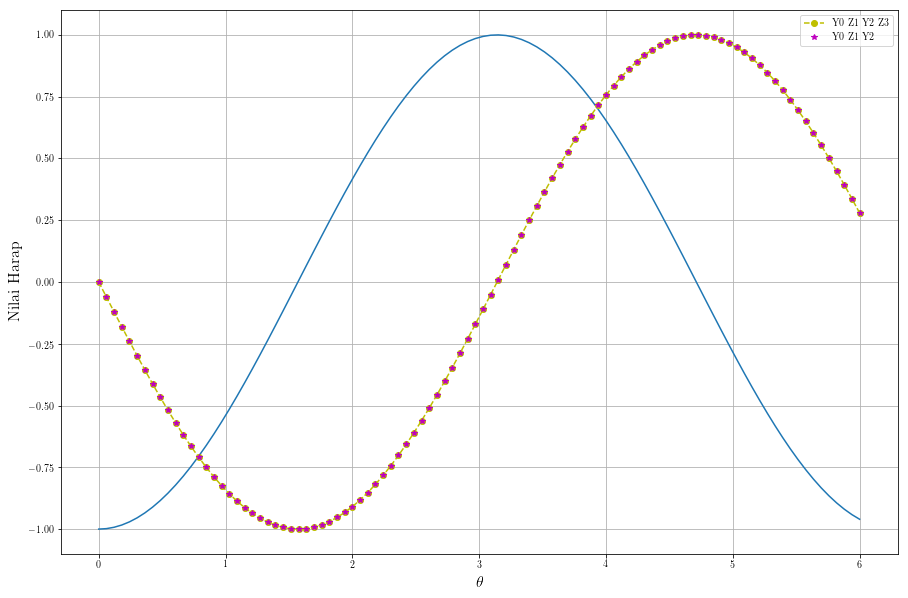

In [74]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_z0)
plt.plot(thetas,E_y0z1y2z3,'y--o',label='Y0 Z1 Y2 Z3')
plt.plot(thetas,E_y0z1y2,'m*',label='Y0 Z1 Y2')
plt.xlabel(r'$\theta$',fontsize=16)
plt.ylabel('Nilai Harap',fontsize=16)
plt.legend()

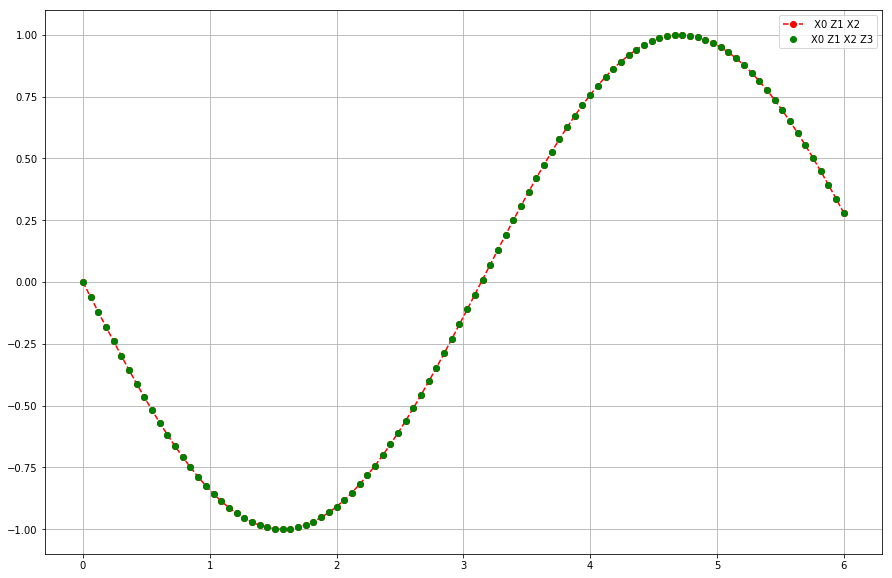

In [61]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_x0z1x2,'r--o',label=' X0 Z1 X2')
plt.plot(thetas,E_x0z1x2z3,'go',label= 'X0 Z1 X2 Z3')
plt.xlabel(r'$\theta$',fontsize=16)
plt.ylabel('Nilai Harap',fontsize=16)
plt.legend()